<a href="https://colab.research.google.com/github/ant-nik/experiments/blob/main/2021-06-21_puts_discretization/linear_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estimation of scan cycle constant for linear model 

Prepares environment for creating and running a model.

In [2]:
! rm -R experiments
! git clone -b main https://github.com/ant-nik/experiments.git
% cd experiments/

rm: cannot remove 'experiments': No such file or directory
Cloning into 'experiments'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 25 (delta 4), reused 11 (delta 2), pack-reused 0
Unpacking objects: 100% (25/25), done.
/content/experiments


In [3]:
import explib.dynamic.plc as plc

Defines linear equations and discrete controller to imitate scan cycle impact.

In [4]:
def linear_model(control):
    def fix_control(x, t):
        return [x[0] + control, 0.0]
    return fix_control

In [5]:
class LinearControl(plc.PLC):
    def __init__(self, goal, gain, dt): # функция инициализации параметров
        super(LinearControl,self).__init__(gain,step=dt)

    def control(self, x, t):
        return -2*x[0]

Calcluates process timeseries.

In [10]:
linear_controller = LinearControl(goal=0.0, gain=1.0, dt=0.1)
result = plc.calculate(func=linear_model, x0=[0.1, 0.0], step=0.001, time=10.0, plc=linear_controller)

dict_keys(['t', 'u', 'x1', 'x2'])


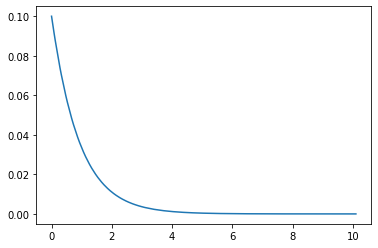

In [11]:
import matplotlib.pyplot as plt 
print(result.keys())
plt.plot(result['t'], result['x1'])